In [ ]:
# Implement logistic regression and linear regression from scratch using numpy and train/test/predict model

In [1]:
import numpy as np
import scipy
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

# read the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

# feature matrix X: mxn
X = dataset.data
print ("X: ", X.shape)

# target vector y: mx1
y = dataset.target
y = y.reshape(y.shape[0], 1)
print ("y: ", y.shape)

# number of samples: m
m = X.shape[0]
print ("m: ", m)

# number of features: n
n = X.shape[1]
features = dataset.feature_names
print ("n: ",n)
print ("features: ", features)

X:  (569, 30)
y:  (569, 1)
m:  569
n:  30
features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


accuracy score: 0.92


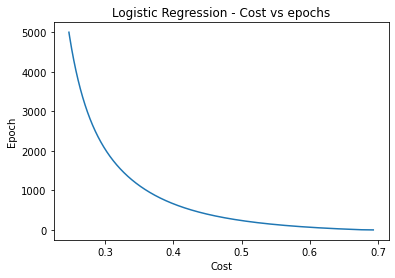

In [3]:

# train the logistic regression model

# initialize nepochs, alpha and eps
nepochs = 5000
alpha = 2.5e-6
eps=1e-8

# initialize w and b
w = np.zeros((n,1))
b = 0

# this list will collect loss for each iteration
costs = []

# repeat for nepochs
for epoch in range(nepochs):
            
    # forward pass (calculate current loss)
    z = np.dot(X,w) + b
    yh = 1/(1+np.exp(-z))
    J = (-1/m) * (np.dot(y.T,np.log(yh)) + np.dot(1-y.T, np.log(1-yh)))
    
    # backward propagation (calculate current gradient)
    dJ_dw = (1/m) * (np.dot(X.T,(yh - y)))
    dJ_db = (1/m) * np.sum((yh - y), axis=0, keepdims=True)
    
    # gradient descent (update parameters)
    w = w - alpha * dJ_dw
    b = b - alpha * dJ_db
    
    # append loss to costs (remember to squeeze J!)
    costs.append(np.squeeze(J))

# use final parameters w and b to calcualte accuracy for training data X, y
#  - do a single forward pass for X: calcualte z, yhat
#  - set yhat to round(yhat) (that is, thresholding binary classification prediction at 0.5)
#  - calcualte accuracy_score(y, yhat) and print it
z = np.dot(X,w) + b
yhat = 1/(1+np.exp(-z))
yhat = [1 if a > 0.5 else 0 for a in yhat]
print('accuracy score: %.2f'%(accuracy_score(y,yhat)))


# plot the costs against iterations and show plot
ne = list(range(nepochs))
plt.plot(costs, ne)
plt.title('Logistic Regression - Cost vs epochs')
plt.xlabel('Cost')
plt.ylabel('Epoch')
plt.show()

In [4]:
# compare results from your implementation to that of SGDClassifier

nepochs = 5000
alpha = 2.5e-6
y = y.reshape(y.shape[0],) # to avoid warning

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', # loss function for logistic regression
                    penalty=None, alpha=0, # no regularization
                    max_iter=nepochs, tol=None, # stop based only on nepochs
                    shuffle=False, random_state=0, # don't shuffle, use random state to replicate results
                    learning_rate='constant', eta0=alpha) # constant learning rate of alpha
clf.fit(X,y)
print (round(clf.score(X,y),2))

0.92


In [5]:

# read the diabetes dataset from sklearn
from sklearn.datasets import load_diabetes

dataset = load_diabetes()

# feature matrix X: mxn
X = dataset.data
print ("X: ", X.shape)

# target vector y: mx1
y = dataset.target
y = y.reshape(y.shape[0], 1)
print ("y: ", y.shape)

# number of samples: m
m = X.shape[0]
print ("m: ", m)

# number of features: n
n = X.shape[1]
features = dataset.feature_names
print ("n: ",n)
print ("features: ", features)

X:  (442, 10)
y:  (442, 1)
m:  442
n:  10
features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Mean Squared Error: 2880.49
R2 score: 0.51


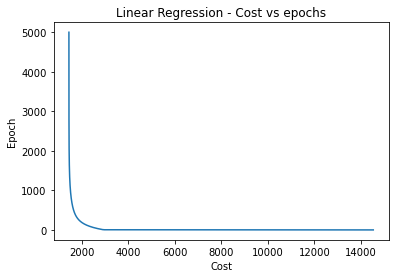

In [6]:
# train the linear regression model

# initialize nepochs and alpha
nepochs = 5000
alpha = 0.5

# initialize w and b
w = np.zeros((n,1))
b = 0

# this list will collect loss for each iteration
costs = []

# repeat for nepochs
for epoch in range(nepochs):
        
    # forward pass (calculate current loss)
    z = np.dot(X,w) + b
    yh = z
    J = (1/(2*m)) * np.dot(np.transpose(yh-y),(yh-y))
    
    # backward propagation (calculate current gradient)
    dJ_dw = (1/m) * (np.dot(X.T,(yh - y)))
    dJ_db = (1/m) * np.sum((yh - y), axis=0, keepdims=True)
    
    # gradient descent (update parameters)
    w = w - alpha * dJ_dw
    b = b - alpha * dJ_db
    
    # append loss to costs (remember to squeeze J!)
    costs.append(np.squeeze(J))

# use final parameters w and b to calcualte mse and r2 for training data X, y
#  - do a single forward pass for X: calcualte z, yhat
#  - calculate mean_squared_error(y, yhat) and print it
#  - calculate r2_score(y, yhat) and print it
z = np.dot(X,w) + b
yhat = z
print('Mean Squared Error: %.2f'%(mean_squared_error(y,yhat)))
print('R2 score: %.2f'%(r2_score(y,yhat)))

# plot the costs against iterations and show plot
ne = list(range(nepochs))
plt.plot(costs, ne)
plt.title('Linear Regression - Cost vs epochs')
plt.xlabel('Cost')
plt.ylabel('Epoch')
plt.show()

In [7]:

# compare results from our implementation to that of SGDRegressor

nepochs = 5000
alpha = 0.5
y = y.reshape(y.shape[0],) # to avoid warning

from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(loss='squared_loss', # mse for linear regression
                    penalty=None, alpha=0, # no regularization
                    max_iter=nepochs, tol=None, # stop based on only on nepochs
                    shuffle=False, random_state=0, # don't shuffle, use random state to replicate results
                    learning_rate='constant', eta0=alpha) # constant learning rate of alpha
clf.fit(X,y)
yhat = clf.predict(X)
print (round(mean_squared_error(y, yhat),2))
print (round(clf.score(X,y),2))

2922.88
0.51


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
